<h1> Criação de um array aleatório para formar imagem</h1>
<ul>
    <blockquote>Foi utilizado a função random.random da classe <code>numpy</code> para gerar a imagem
        <br>Foi adicionado o colorbar para analise de cores</blockquote>
</ul>

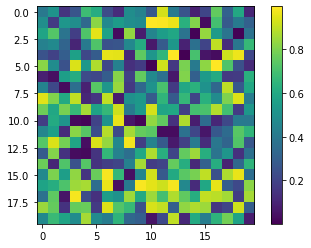

In [3]:
import numpy as np
from matplotlib import pyplot as plt
random_image = np.random.random([20, 20])
plt.imshow(random_image)
plt.colorbar()

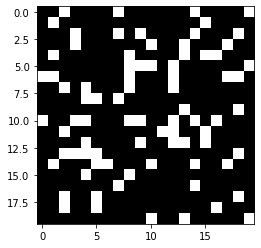

In [4]:
rows, cols = random_image.shape

for i in range(rows):
    for j in range(cols):
        if random_image[i, j] > 0.2:
            random_image[i, j] = 0
        else:
            random_image[i, j] = 1
plt.imshow(random_image, cmap='gray')

Type: <class 'numpy.ndarray'>
dtype: uint8
shape: (303, 384)


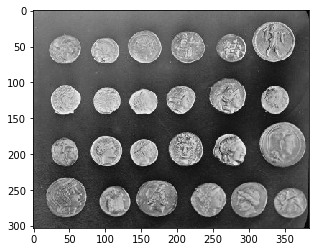

In [5]:
from skimage import data

coins = data.coins()

print(f'Type: {type(coins)}')
print('dtype:', coins.dtype)
print('shape:', coins.shape)
plt.imshow(coins, cmap='gray')

Type: <class 'numpy.ndarray'>
uint8
(413, 550, 3)
0 255


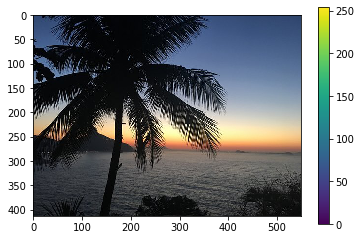

In [7]:
from skimage import io
from matplotlib import pyplot as plt

img = io.imread('praia.jpg')
print('Type:', type(img))
print(img.dtype)
print(img.shape)
print(img.min(), img.max())

plt.imshow(img)
plt.colorbar()

In [26]:
ic = io.ImageCollection('*.jpg') # Coleção de todas as imagens num determinado diretorio
ic.files

['destaque.jpg', 'lua2.jpg', 'praia.jpg', 'terra.jpg']

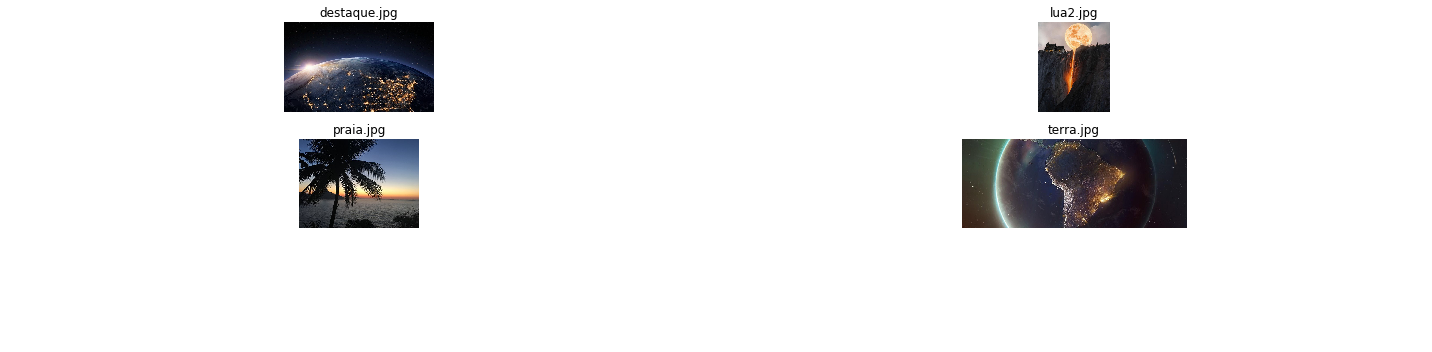

In [28]:
import os

f, axes = plt.subplots(nrows=3, ncols=len(ic) // 3 + 1, figsize=(20, 5))
axes = axes.ravel()

# Desativando as coordenadas
for ax in axes:
    ax.axis('off')

# Plotando e nomeando as imagens através de seus nomes pela biblioteca os
for i, image in enumerate(ic):
    axes[i].imshow(image)
    axes[i].set_title(os.path.basename(ic.files[i]))

plt.tight_layout()

In [29]:
# Exemplo simples de como funciona a enumeração de listas em python
animais = ['gato', 'cachorro', 'pato']

for i, animal in enumerate(animais):
    print(f'O animal da posição {i} é o {animal}')

O animal da posição 0 é o gato
O animal da posição 1 é o cachorro
O animal da posição 2 é o pato


#  Teste imagem criada por função sen x cos
<strong>obs:</strong> função linspace gera n numeros entre dois parâmetros dados inicialmente <i>(olhar na documentação digitando um '?' depois da função)</i>

In [11]:
import numpy as np
from matplotlib import pyplot as plt

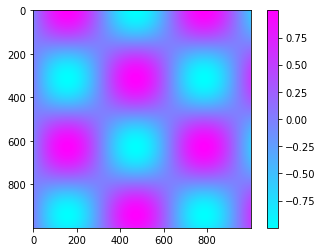

In [13]:
x = np.linspace(0, 10, 1000)
i = np.sin(x) * np.cos(x[:, np.newaxis])
plt.imshow(i, cmap='gray')
plt.cool()
plt.colorbar()

In [31]:
# Olhando a documentação da função linspace:
np.linspace?

# Binarizando imagem pixel por pixel
<blockquote>Foi percorrendo todo o vetor da imagem e comparando com um pixel anterior salvo na variavel <code>ant</code>, se a diferença entre os pixels forem significativas é 'pintado' o pixel de preto, se não, de branco </blockquote>

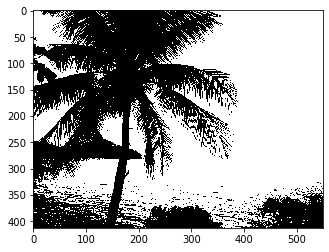

In [32]:
from skimage import io
from matplotlib import pyplot as plt

# Seleção da imagem e inicialização das variáveis
img = io.imread('praia.jpg')
rows, cols, col = img.shape
dif = 0
ant  = 0

# Percorrendo a imagem e calculando as diferenças
for i in range(rows):
    for j in range(cols):
        dif = img[i, j] - ant
        if dif[0] > 80 or dif[1]>50 or dif[2]>150:
            img[i, j] = [255, 255, 255]
        else:
            img[i, j] = [0, 0, 0]
        ant = img[i, j]
        
plt.imshow(img)

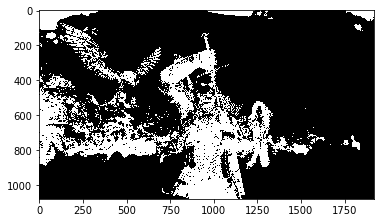

In [33]:
from skimage import io
from matplotlib import pyplot as plt

img = io.imread('witcher.png')
rows, cols, col = img.shape
dif = 0
ant  = 0
for i in range(cols):
    for j in range(rows):
        dif = img[j, i] - ant
        if dif[0] > 80 or dif[1]> 50 or dif[2]> 90:
            img[j, i] = [0, 0, 0]
        else:
            img[j, i] = [255, 255, 255]
        ant = img[j, i]
        
plt.imshow(img)

# Criando função que desenha na imagem
Basicamente é selecionado uma parte da imagem nas coordenadas escolhidas, pela variavel 'H' e logo em seguida fazer as alterações desejadas, lembrado que 'H' está ligado a 'out' 



In [16]:
def draw_h(image, coords, color = (0, 255, 0)):
    # É feita uma cópia da imagem
    out = image.copy()
    
    # Salvar as coordenadas do desenho
    r, c = coords
    
    # Seleção do frame da imagem
    H = out[r:r+24, c:c+20]
    
    H[:, :3, :] = color # Pinta na cor das primeiras 3 colunas
    H[:, -3:, :] = color # Pinta as ultimas 3 colunas
    H[11:15, :] = color # pinta as linhas do meio
    
    return out 

# Separando os canais de uma imagem colorida
<p><blockquote> Uma imagem pode apresentar um ou mais canais que juntos formam a imagem toda, como é o caso das imagens <code>RGB</code>, compostas por 3 canais de cores (vermelho, verde e azul) que juntos formam uma imagem colorida
    </blockquote> A separação dos canais pode ser feita pelo código abaixo:  </p>

Text(0.5, 1.0, 'blue')

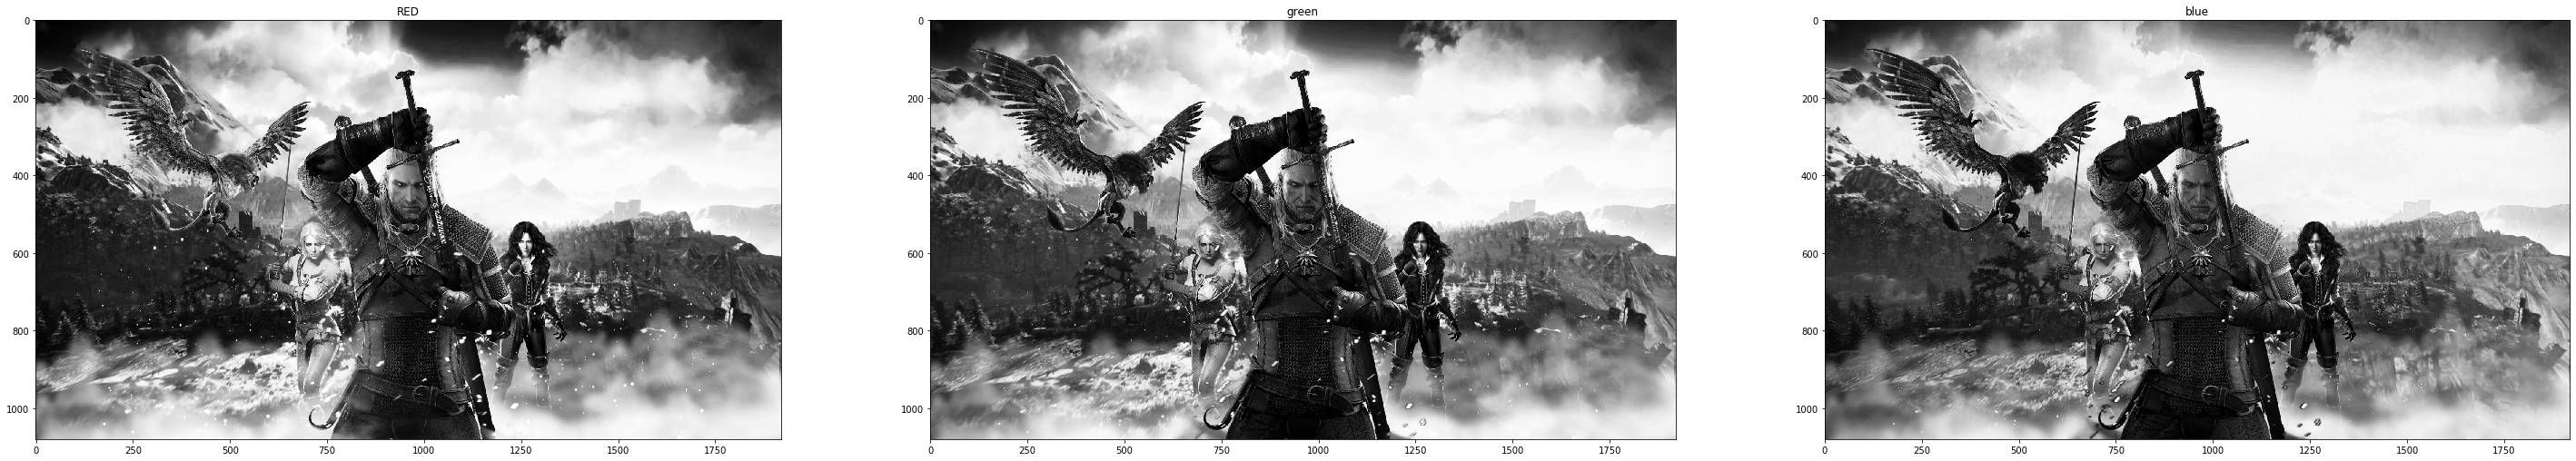

In [37]:
# Seleção da imagem
img = io.imread('witcher.png')

# Canais
r = img[..., 0]
g = img[..., 1]
b = img[..., 2]

# Inicializando a plotagem
f, axes = plt.subplots(1, 3, figsize=(50, 25))

# Configurando os eixos
(ax_r, ax_g, ax_b) = axes

ax_r.imshow(r, cmap='gray')
ax_r.set_title('RED')

ax_g.imshow(g, cmap='gray')
ax_g.set_title('green')

ax_b.imshow(b, cmap='gray')
ax_b.set_title('blue')



# Pixelizando uma imagem
<p> <blockquote> Uma maneira simples de pixelizar uma imagem é através do slicing de arrays do numpy que é representado da forma = <code>exemplo[inicio:fim:passo]</code> <p>O que faremos aqui é selecionar um pixel a cada 20 da seguinte maneira:<p/> </blockquote> </p>

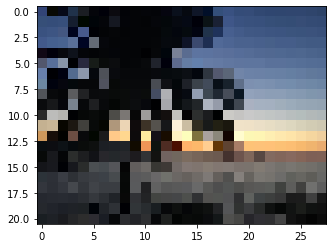

In [20]:
img = io.imread('praia.jpg')
plt.imshow(img[::20,::20])